In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
!pip install datascience

You should consider upgrading via the 'C:\Users\farza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [9]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Cleaning the Data and Making the Tables

In [10]:
masks = Table.read_table('masks.csv')
vaccine_acceptance = Table.read_table('vaccine_acceptance.csv')
masks

regionId,value
AL,46.2347
AK,69.6364
AZ,54.7612
AR,45.2742
CA,75.8951
CO,56.6574
CT,65.2487
DE,56.6153
FL,50.9613
GA,55.1978


In [11]:
vaccine_acceptance #this table also has the State's Political party which will be our target variable later on

regionId,value,Party
AL,77.3598,R
AK,84.3956,R
AZ,82.3001,D
AR,79.0484,R
CA,90.031,D
CO,85.9051,D
CT,92.4632,D
DE,86.531,D
FL,82.8571,R
GA,81.7714,D


## Renaming the columns in the Table

In [12]:
masks = masks.with_column('%_wearing_masks', masks.column(1)).drop(1)
vaccine_acceptance = vaccine_acceptance.with_column('%_fine_with_vaccine', vaccine_acceptance.column(1)).drop(1)
masks

regionId,%_wearing_masks
AL,46.2347
AK,69.6364
AZ,54.7612
AR,45.2742
CA,75.8951
CO,56.6574
CT,65.2487
DE,56.6153
FL,50.9613
GA,55.1978


In [13]:
vaccine_acceptance

regionId,Party,%_fine_with_vaccine
AL,R,77.3598
AK,R,84.3956
AZ,D,82.3001
AR,R,79.0484
CA,D,90.031
CO,D,85.9051
CT,D,92.4632
DE,D,86.531
FL,R,82.8571
GA,D,81.7714


In [14]:
#reordering column in vaccine_acceptance table

vaccine_acceptance = vaccine_acceptance.with_column("Political_Party", vaccine_acceptance.column(1)).drop(1)
vaccine_acceptance

regionId,%_fine_with_vaccine,Political_Party
AL,77.3598,R
AK,84.3956,R
AZ,82.3001,D
AR,79.0484,R
CA,90.031,D
CO,85.9051,D
CT,92.4632,D
DE,86.531,D
FL,82.8571,R
GA,81.7714,D


In [15]:
#combining the tables

compiled_table = masks.with_columns(
    '%_fine_with_vaccine', vaccine_acceptance.column(1),
    'Political_Party', vaccine_acceptance.column(2)
)

compiled_table

regionId,%_wearing_masks,%_fine_with_vaccine,Political_Party
AL,46.2347,77.3598,R
AK,69.6364,84.3956,R
AZ,54.7612,82.3001,D
AR,45.2742,79.0484,R
CA,75.8951,90.031,D
CO,56.6574,85.9051,D
CT,65.2487,92.4632,D
DE,56.6153,86.531,D
FL,50.9613,82.8571,R
GA,55.1978,81.7714,D


In [16]:
compiled_table_democrat = compiled_table.where('Political_Party', 'D')
compiled_table_republican = compiled_table.where('Political_Party', 'R')
compiled_table_democrat

regionId,%_wearing_masks,%_fine_with_vaccine,Political_Party
AZ,54.7612,82.3001,D
CA,75.8951,90.031,D
CO,56.6574,85.9051,D
CT,65.2487,92.4632,D
DE,56.6153,86.531,D
GA,55.1978,81.7714,D
HI,81.3256,93.5542,D
IL,74.7552,86.7501,D
ME,55.9677,85.007,D
MD,71.4344,92.0252,D


# Graphing our Table Data

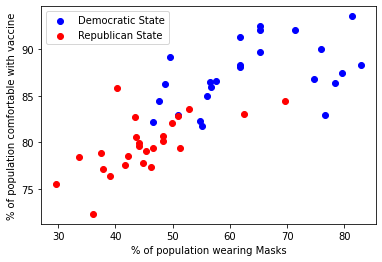

In [17]:
x = compiled_table_democrat.column(1)
y = compiled_table_democrat.column(2)
plt.scatter(x, y, color = 'blue', label = "Democratic State")

x = compiled_table_republican.column(1)
y = compiled_table_republican.column(2)
plt.scatter(x, y, color = 'red', label = "Republican State")
plt.xlabel('% of population wearing Masks')
plt.ylabel('% of population comfortable with vaccine')

plt.legend()
plt.show()

# Machine Learning Portion

In [18]:
# Now we just need to import and use scikit learn to create a model that predicis if states are republican or demographic based on mask and vaccine data

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [20]:
df = compiled_table.to_df()
features = ['%_wearing_masks', '%_fine_with_vaccine']
X = df[features]
y = df['Political_Party']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8666666666666667


In [23]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5, 2],
       [0, 8]], dtype=int64)